<a href="https://colab.research.google.com/github/paolala24/aprendizaje_maquinas/blob/main/talleres/2_DL_Keras_API_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras.

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [1]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.18.0


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

In [2]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


- Se presenta un ejemplo de la base de datos

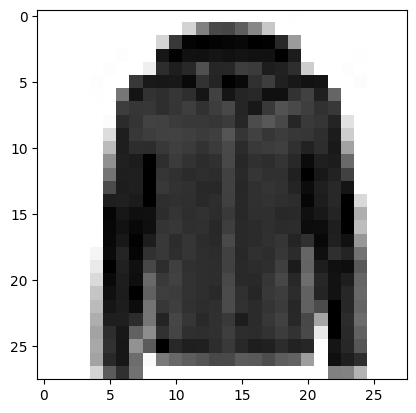

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [4]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [5]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

- En el cuaderno introductorio a redes neuronales con tensorflow se planteó la construcción de modelos mediante secuencia de capas:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ red1 (Dense)                    │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hred2 (Dense)                   │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

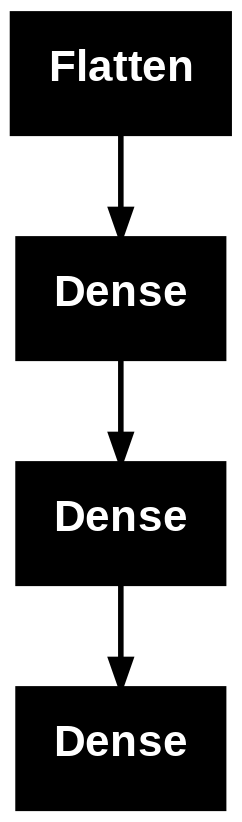

In [6]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

- Aunque la implementacióm mediante secuencia es intuitiva, no permite realizar conexiones flexibles entre capas.

- En ese sentido, Keras permite crear capas bajo el principio de funciones y argumentos, como se muestra a continuación.

**Nota**: a diferencia de la estructura secuencial, en la API funcional se debe indicar la capa o capas de entrada y la capa o capas de salida para crear el grafo computacional de forma apropiada.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h1 (Dense)                      │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

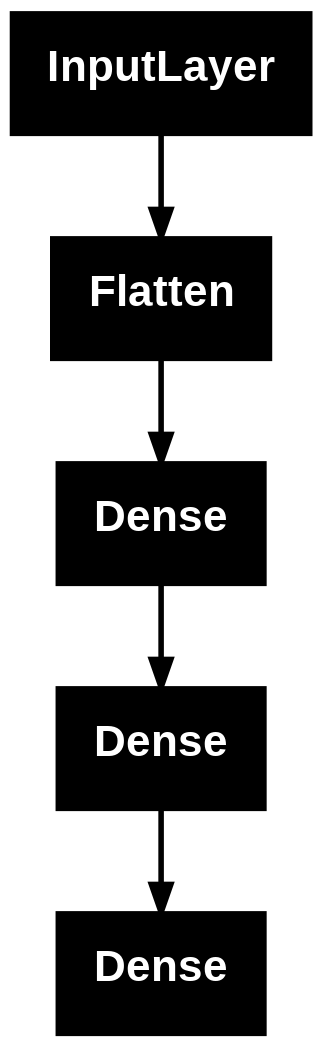

In [7]:
#arquitectura funcional
#capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
#capa de aplanamiento de las imágenes
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)#argumento de entrada
#capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)#argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
#crear modelo según conexiones tipo funcionales
model_fun = tf.keras.Model(inputs=input_l,outputs=output)

#resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


# La API funcional permite realizar conexiones más flexibles

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


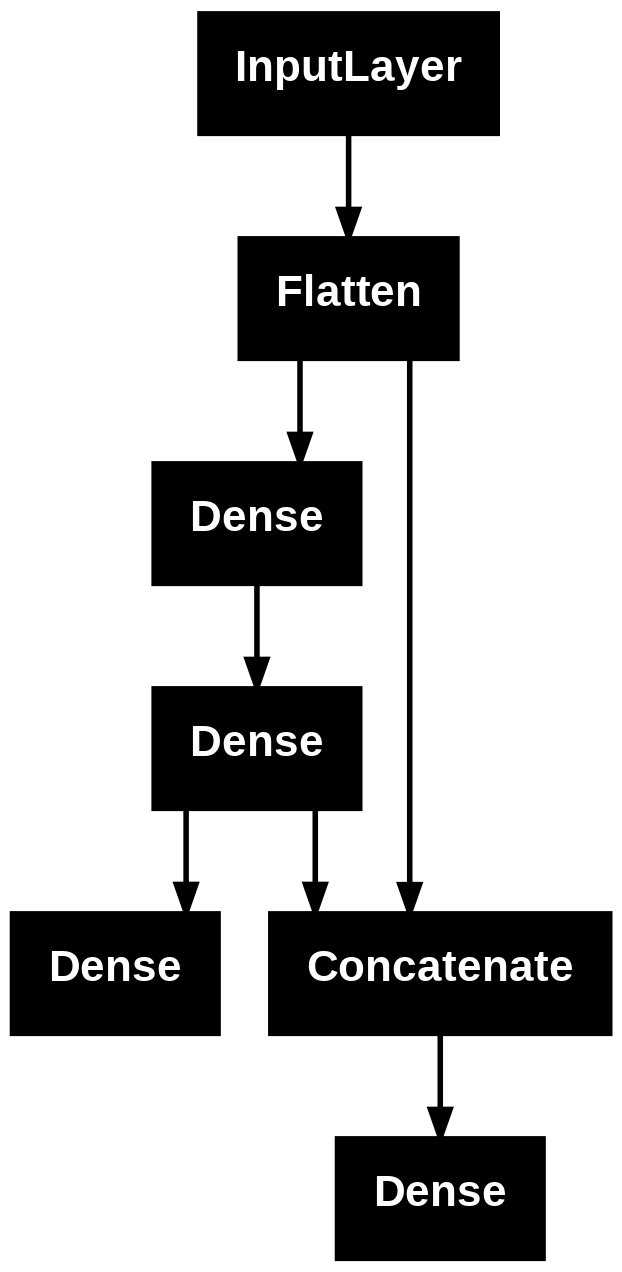

In [8]:
#arquitectura funcional 2
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para cada salida, o una lista con los costos requeridos. Además, en la lista `loss_weights` se puede especificar el valor del peso asociado al costo de cada salida en el intervalo [0,1].

In [9]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy


- El entrenamiento se realiza de igual forma al utilizado con el modelo secuencial.

- Como se fijaron dos salidas, se debe ingresar una lista para los argumentos ytrain.

In [10]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.4748 - outputA_accuracy: 0.7318 - outputA_loss: 0.7958 - outputB_accuracy: 0.7645 - outputB_loss: 0.6790 - val_loss: 0.8492 - val_outputA_accuracy: 0.8484 - val_outputA_loss: 0.4262 - val_outputB_accuracy: 0.8452 - val_outputB_loss: 0.4223
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.8143 - outputA_accuracy: 0.8527 - outputA_loss: 0.4131 - outputB_accuracy: 0.8567 - outputB_loss: 0.4012 - val_loss: 0.7648 - val_outputA_accuracy: 0.8591 - val_outputA_loss: 0.3856 - val_outputB_accuracy: 0.8619 - val_outputB_loss: 0.3781
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.7083 - outputA_accuracy: 0.8704 - outputA_loss: 0.3570 - outputB_accuracy: 0.8720 - outputB_loss: 0.3513 - val_loss: 0.7326 - val_outputA_accuracy: 0.8665 - val_outputA_loss: 0.3692 - val_outputB_accuracy: 0.8683 - val_outputB_loss: 0.3622
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6574 - outputA_accuracy: 0.8782 

- Se presentan las curvas de desempeño:

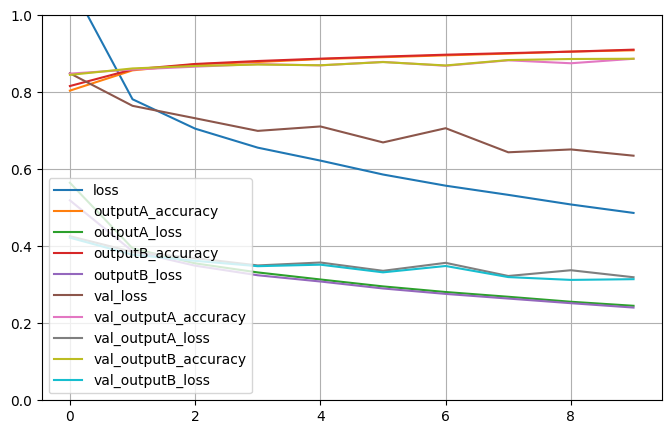

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

- Como el modelo generado presenta dos salidas, el rendimiento se discrimina por cada salida y el acumulado.

- A la hora de predecir la salida para una nueva muestra, se debe tener en cuenta la cantidad de salidas fijadas.

In [12]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10) (10000, 10)


In [13]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


In [14]:
scoreA = model_fun.evaluate(Xtest,[ytest,ytest])#evaluacion
print(scoreA)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6901 - outputA_accuracy: 0.8789 - outputA_loss: 0.3495 - outputB_accuracy: 0.8804 - outputB_loss: 0.3406
[0.6834747791290283, 0.3458552360534668, 0.33726027607917786, 0.8806999921798706, 0.8817999958992004]


# Grafiquemos los pesos respecto a las dimensiones de la imagen original

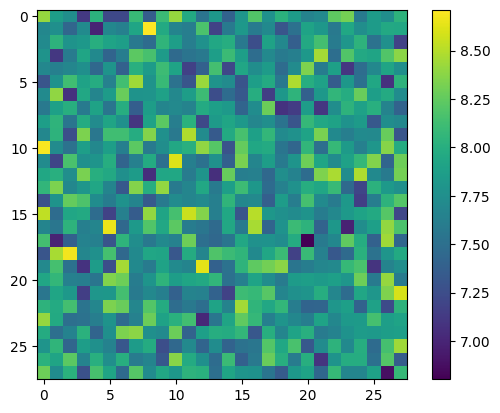

In [15]:
#se busca identificar las entradas más relevantes para la red
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [16]:
model.layers[1].get_weights()[1].shape # accediendo a los bias

(200,)

# Salidas parciales de la red

- La estrategia funcional nos permite acceder a partes intermedias de la red para encontrar mapas de características y verificar el aprendizaje de la representación.

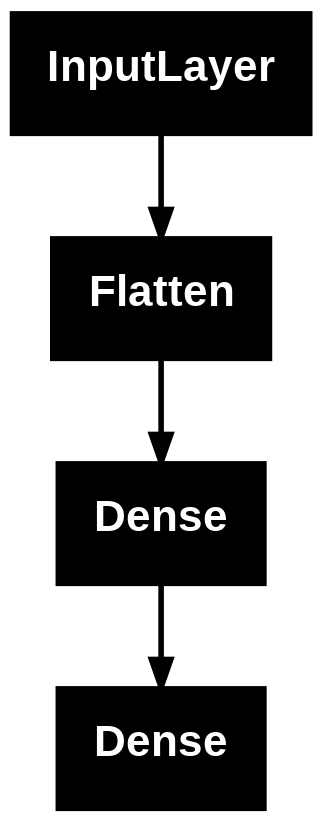

In [17]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!


In [18]:
z = model_B.predict(Xtest) # salida en h2
z.shape

  1/313 ━━━━━━━━━━━━━━━━━━━━ 1:04 205ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


(10000, 50)

### Dado que se fijaron 50 unidades, se pueden utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D.


# Principal Component Analysis (PCA)

Reducción de dimensión lineal basado en la preservación de la varianza

![PCA1](https://www.soloentendidos.com/wp-content/uploads/2021/06/Principal-Component-Analysis-second-principal_thumb-1.gif)


![PCA2](https://1.bp.blogspot.com/-pgMAHiIWvuw/Tql5HIXNdRI/AAAAAAAABLI/I2zPF5cLRwQ/s1600/clust.gif)


# t-student distributed Stochastic Neighbor Embedding (t-SNE)

Reducción de dimensión basado en la preservación de localidades (vecinos) utilizando medidas de información desde estimación no paramétrica de probabilidad en el espación de alta y baja dimensión, respectivamente.

![tsne](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)

![tsne2](https://3.bp.blogspot.com/-NE01azL_JxU/Wxli17oYNzI/AAAAAAAACxQ/axOI2yy-Ft0QbqaekOyemm5Xn0wAFvRUwCLcBGAs/s640/image2.gif)

In [19]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

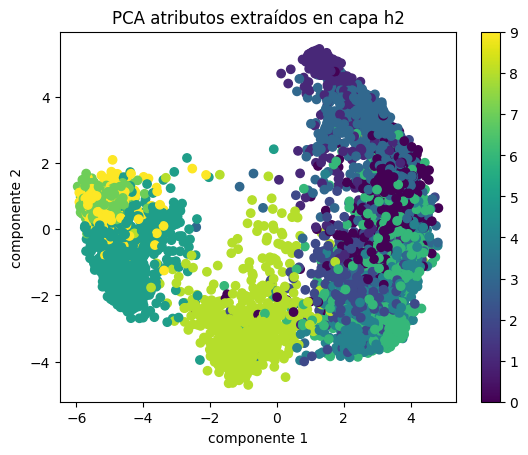

In [20]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()

In [21]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- También, podemos revisar la distribución de las imágenes en el espacio proyectado:

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

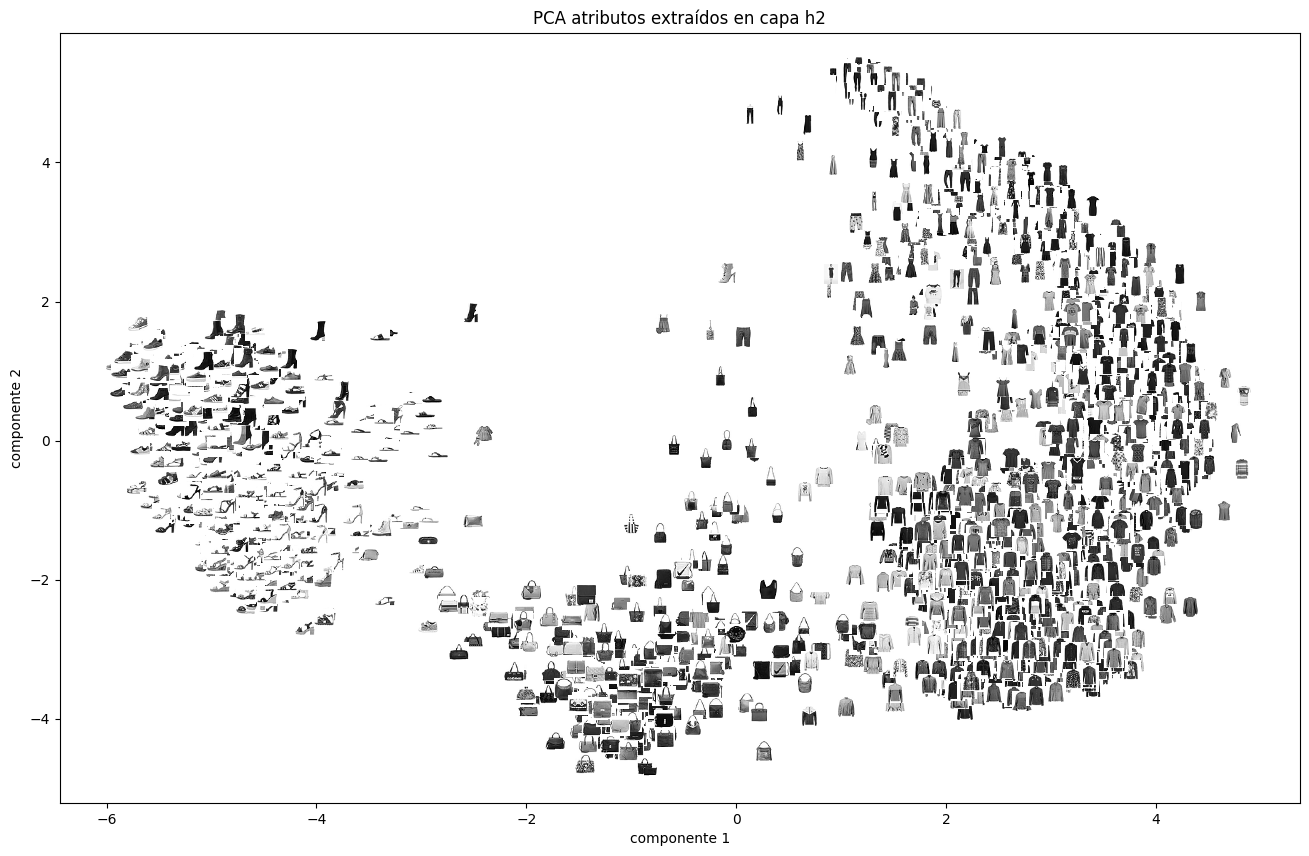

In [22]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

# Ejercicio:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

- Repita el proceso aplicando la técnica de reducción de dimensión [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Nota: escoja un subconjunto aleatorio de 4000 datos para que el algoritmo t-SNE converja sin problemas de memoría.

- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

In [23]:
#veector de salida par o impar
ytrain_B = (ytrain % 2)
print(ytrain_B[10:])
print(ytrain[10:])

[0 1 1 ... 1 0 1]
[0 9 5 ... 3 0 5]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


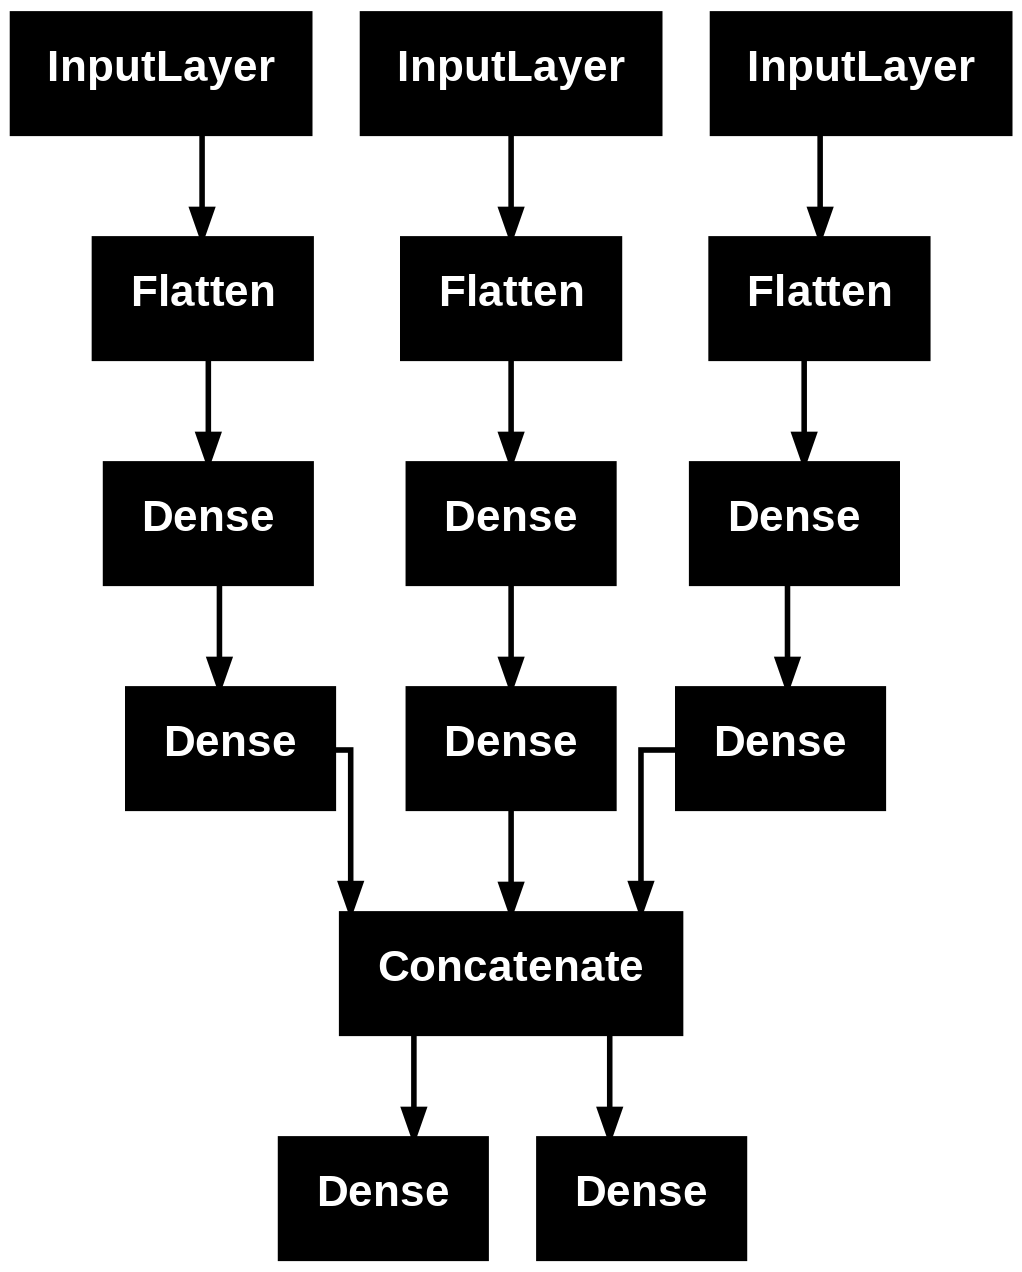

In [24]:
#arquitectura funcional 2 - Ayuda de código con capas densas - cambiar a capas cnn
tf.keras.backend.clear_session()
input_1 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_3')

flatten_1 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_1)
flatten_2 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_2)
flatten_3 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_3)

h1_1 = tf.keras.layers.Dense(200,activation='tanh',name='h1_1')(flatten_1)
h2_1 = tf.keras.layers.Dense(50,activation='tanh',name='h2_1')(h1_1)

h1_2 = tf.keras.layers.Dense(200,activation='tanh',name='h1_2')(flatten_2)
h2_2 = tf.keras.layers.Dense(50,activation='tanh',name='h2_2')(h1_2)

h1_3 = tf.keras.layers.Dense(200,activation='tanh',name='h1_3')(flatten_3)
h2_3 = tf.keras.layers.Dense(50,activation='tanh',name='h2_3')(h1_3)

#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2_1,h2_2,h2_3])
#se crean dos salidas:
output_d = tf.keras.layers.Dense(10,activation="softmax",name='output_d')(concat)#desde concatenación
output_p = tf.keras.layers.Dense(1,activation="sigmoid",name='output_p')(concat)#desde h2
#las entradas y salidas se ingresan como listas
model_fun2 = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output_d, output_p])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun2)

In [25]:
#Entrenar y ajustar el modelo, revisar rendimientos en cada salida

## Ejercicio 1

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

# plt.imshow(images[10000,:,:], cmap = 'binary')
# plt.show()
# print(np.unique(labels))

# Normalización de los valores de los pixeles
images = images / 255.
x, y = test
x = x / 255.

#arquitectura funcional
tf.keras.backend.clear_session()

input_l = tf.keras.layers.Input(shape = (images.shape[1], images.shape[2]), name = 'Input')
flatten = tf.keras.layers.Flatten(input_shape = (images.shape[1], images.shape[2]))(input_l)
h1 = tf.keras.layers.Dense(200, activation = 'tanh', name = 'h1')(flatten)
h2 = tf.keras.layers.Dense(50, activation = 'tanh', name = 'h2')(h1)
concatenate = tf.keras.layers.concatenate([h2, flatten])
output_lA = tf.keras.layers.Dense(10, activation = "softmax", name = 'OutputA')(h2)
output_lB = tf.keras.layers.Dense(10, activation = "softmax", name = 'OutputB')(concatenate)

model = tf.keras.Model(inputs = input_l, outputs = [output_lA, output_lB])
# model.summary()
# tf.keras.utils.plot_model(model)
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy","accuracy"])

history = model.fit(images, [labels, labels] , epochs = 10, batch_size = 64,
                        validation_split = 0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - OutputA_accuracy: 0.7580 - OutputA_loss: 0.6867 - OutputB_accuracy: 0.7305 - OutputB_loss: 0.7953 - loss: 1.4819 - val_OutputA_accuracy: 0.8572 - val_OutputA_loss: 0.3953 - val_OutputB_accuracy: 0.8508 - val_OutputB_loss: 0.4138 - val_loss: 0.8093
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - OutputA_accuracy: 0.8575 - OutputA_loss: 0.3901 - OutputB_accuracy: 0.8549 - OutputB_loss: 0.3997 - loss: 0.7898 - val_OutputA_accuracy: 0.8648 - val_OutputA_loss: 0.3727 - val_OutputB_accuracy: 0.8622 - val_OutputB_loss: 0.3775 - val_loss: 0.7505
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - OutputA_accuracy: 0.8744 - OutputA_loss: 0.3475 - OutputB_accuracy: 0.8717 - OutputB_loss: 0.3563 - loss: 0.7037 - val_OutputA_accuracy: 0.8720 - val_OutputA_loss: 0.3517 - val_OutputB_accuracy: 0.8693 - val_OutputB_loss: 0.3681 - val_loss: 0.7201
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - OutputA_accuracy: 0.8837 - OutputA_loss:

 39/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['Input']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['Input']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


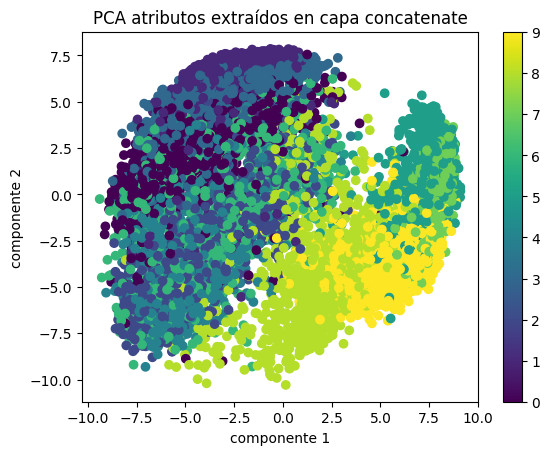

Text(0.5, 1.0, 'PCA atributos extraídos en capa concatenate')

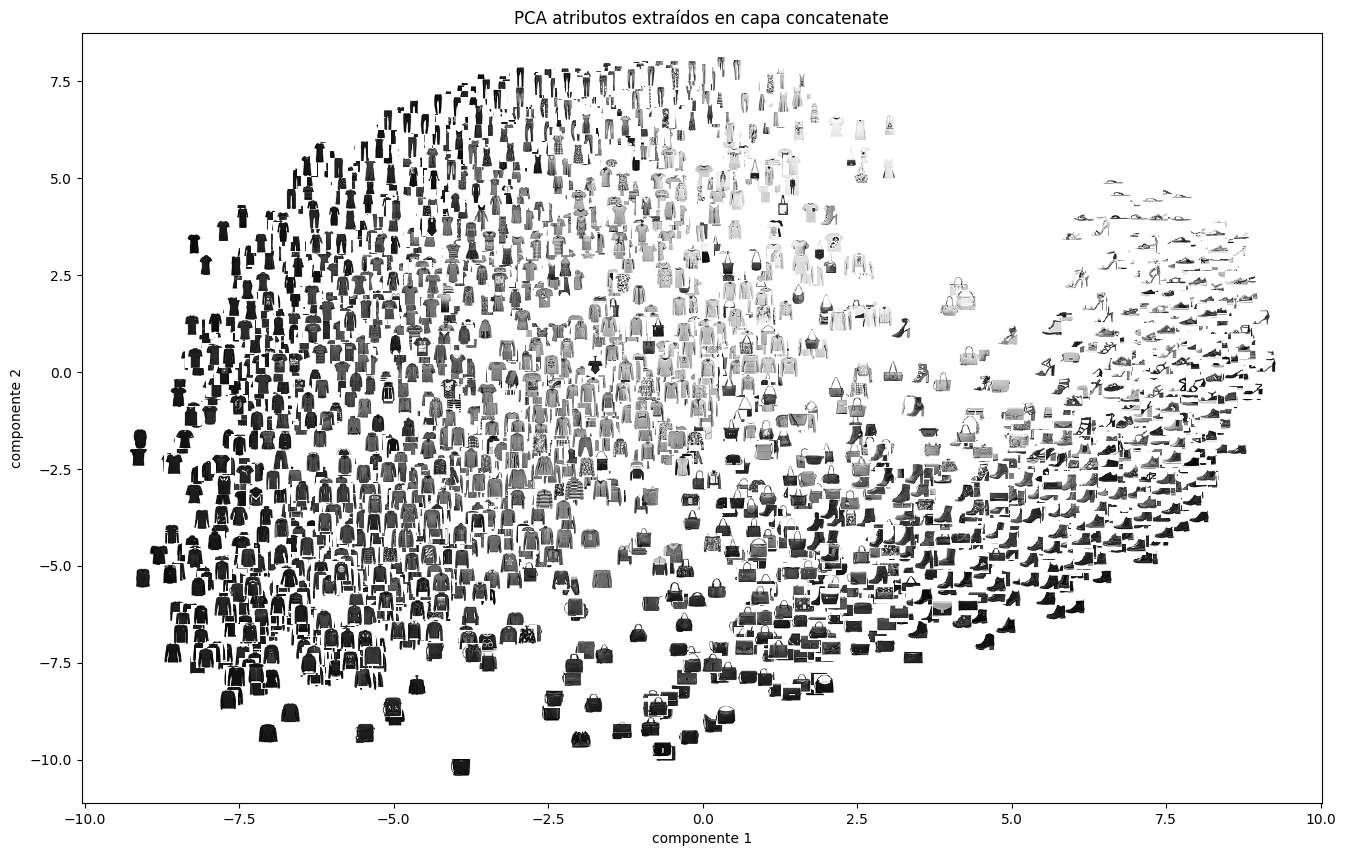

In [27]:
model_A = tf.keras.Model(inputs = model.inputs, outputs = model.get_layer('concatenate').output)
z_A = model_A.predict(x)
# z_A.shape
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#plot mnist 2D
def plot_mnist_2d(Z, y, images, img_w = 28, img_h = 28, zoom = 0.5, cmap = 'jet'):
    fig, ax = plt.subplots(figsize = (16,10))
    for i in range(Z.shape[0]):
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

zPCA = PCA(n_components=2).fit_transform(z_A)

plt.scatter(zPCA[:,0], zPCA[:,1], c = y)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa concatenate')
plt.show()

Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0, y.shape[0], Ni)
plot_mnist_2d(zPCA[ind], y[ind], x[ind], img_w = 28, img_h = 28, zoom = 0.5, cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa concatenate')

## Ejercicio 2

In [28]:
import random
from sklearn.manifold import TSNE

n = 4000
ind = np.random.choice(z_A.shape[0], n, replace=False)
z_nA = z_A[ind, :]

zTSNE = TSNE(n_components = 2).fit_transform(z_nA)
zTSNE.shape

(4000, 2)

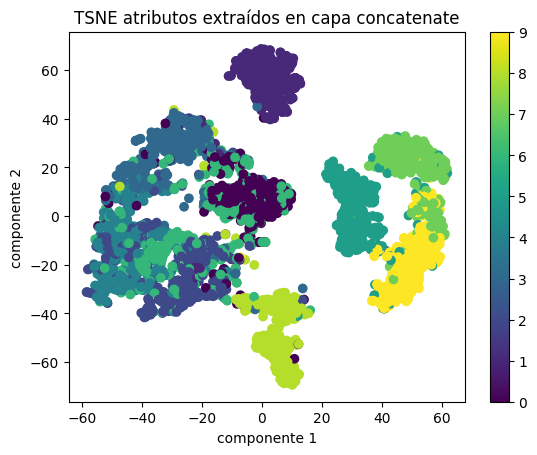

Text(0.5, 1.0, 'TSNE atributos extraídos en capa concatenate')

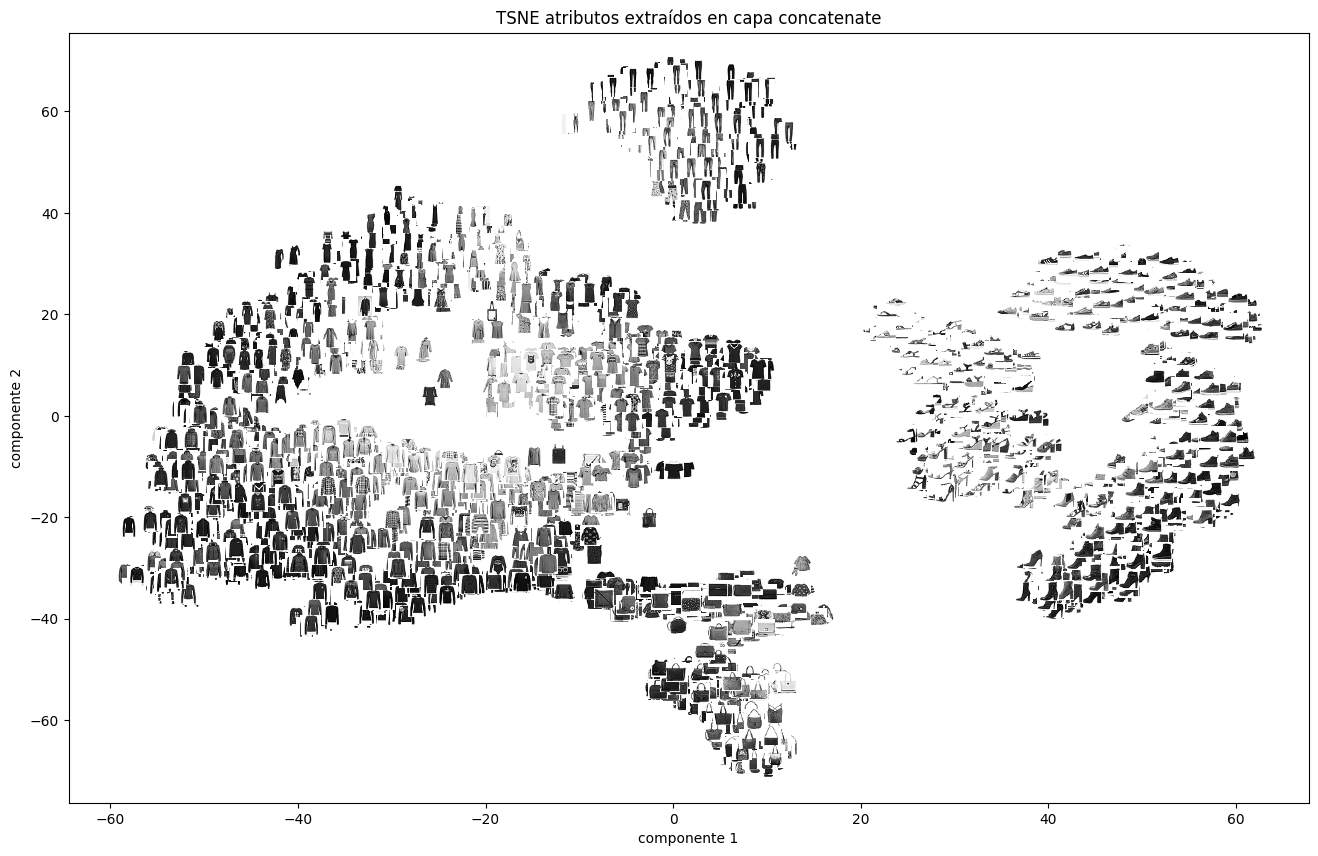

In [29]:
plt.scatter(zTSNE[:,0], zTSNE[:,1], c = y[ind])
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('TSNE atributos extraídos en capa concatenate')
plt.show()

plot_mnist_2d(zTSNE, y[ind], x[ind], img_w = 28, img_h = 28, zoom = 0.5, cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('TSNE atributos extraídos en capa concatenate')

## Punto 3

In [30]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

train, test = tf.keras.datasets.mnist.load_data()
images, labels = train

# plt.imshow(images[10000,:,:], cmap = 'binary')
# plt.show()
# print(np.unique(labels))

# Normalización de los valores de los pixeles
images = images / 255.
x, y = test
x = x / 255.
images = np.expand_dims(images, -1)
x = np.expand_dims(x, -1)

images_train, images_valid = images[:-5000], images[-5000:]
labels_train, labels_valid = labels[:-5000], labels[-5000:]
# print(images_train.shape, images_valid.shape, x.shape)

variance = [0.05, 0.25]
inputs_train = [images_train]
inputs_valid = [images_valid]
inputs_test = [x]
for var in variance:
    dim = images_train.shape
    tmp = images_train + (np.sqrt(var)*np.random.randn(images_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = images_valid.shape
    tmp = images_valid + (np.sqrt(var)*np.random.randn(images_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = x.shape
    tmp = x + (np.sqrt(var)*np.random.randn(x.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]

# plt.imshow(np.c_[inputs_valid[0][500,:,:,0],inputs_valid[1][500,:,:,0],inputs_valid[2][500,:,:,0]])
# plt.axis('off')
# plt.colorbar()
# plt.show()

#arquitectura funcional
tf.keras.backend.clear_session()

def sharedLayers(inputLayer):
    x = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu')(inputLayer)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Flatten()(x)
    return x

input_l1 = tf.keras.layers.Input(shape = (28, 28, 1), name = 'Clean Input')
input_l2 = tf.keras.layers.Input(shape = (28, 28, 1), name = 'Low Noise Input')
input_l3 = tf.keras.layers.Input(shape = (28, 28, 1), name = 'Noise Input')

# Extracción de características por medio de capas convolucionales
convolutional_layers1 = sharedLayers(input_l1)
convolutional_layers2 = sharedLayers(input_l2)
convolutional_layers3 = sharedLayers(input_l3)

concatenate = tf.keras.layers.concatenate([convolutional_layers1, convolutional_layers2, convolutional_layers3])

# Hacemos converger esas características a una decisión usando capas densas
h1 = tf.keras.layers.Dense(128, activation = 'relu', name = 'h1')(concatenate)
h2 = tf.keras.layers.Dense(64, activation = 'relu', name = 'h2')(h1)

output_lA = tf.keras.layers.Dense(10, activation = "softmax", name = 'Digits')(h2)
output_lB = tf.keras.layers.Dense(2, activation = "softmax", name = 'Parity')(h2)

model = tf.keras.Model(inputs = [input_l1, input_l2, input_l3], outputs = [output_lA, output_lB])
# model.summary()
tf.keras.utils.plot_model(model)

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy","accuracy"])

history = model.fit(
    x = {'Clean Input': inputs_train[0], 'Low Noise Input': inputs_train[1], 'Noise Input': inputs_train[2]},
    y = {'Digits': labels_train, 'Parity': labels_train % 2},
    epochs = 10,
    batch_size = 64,
    validation_data = (
        {'Clean Input': inputs_valid[0], 'Low Noise Input': inputs_valid[1], 'Noise Input': inputs_valid[2]},
        {'Digits': labels_valid, 'Parity': labels_valid % 2}
    )
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - Digits_accuracy: 0.8598 - Digits_loss: 0.4593 - Parity_accuracy: 0.9258 - Parity_loss: 0.1774 - loss: 0.6367 - val_Digits_accuracy: 0.9812 - val_Digits_loss: 0.0593 - val_Parity_accuracy: 0.9878 - val_Parity_loss: 0.0367 - val_loss: 0.0970
Epoch 2/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - Digits_accuracy: 0.9808 - Digits_loss: 0.0613 - Parity_accuracy: 0.9885 - Parity_loss: 0.0341 - loss: 0.0954 - val_Digits_accuracy: 0.9842 - val_Digits_loss: 0.0522 - val_Parity_accuracy: 0.9892 - val_Parity_loss: 0.0311 - val_loss: 0.0842
Epoch 3/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - Digits_accuracy: 0.9876 - Digits_loss: 0.0389 - Parity_accuracy: 0.9927 - Parity_loss: 0.0202 - loss: 0.0592 - val_Digits_accuracy: 0.9878 - val_Digits_loss: 0.0407 - val_Parity_accuracy: 0.9930 - val_Parity_loss: 0.0238 - val_loss: 0.0652
Epoch 4/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - Digits_accu

In [31]:
y_labels = y
y_odd_pair = (y % 2)

z = model.predict(
    {'Clean Input': x, 'Low Noise Input': inputs_test[1], 'Noise Input': inputs_test[2]}
)
accuracy = model.evaluate(
    {'Clean Input': x, 'Low Noise Input': inputs_test[1], 'Noise Input': inputs_test[2]},
    {'Digits': y_labels, 'Parity': y_odd_pair}
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Digits_accuracy: 0.9758 - Digits_loss: 0.1061 - Parity_accuracy: 0.9816 - Parity_loss: 0.0721 - loss: 0.1781


In [32]:
z_digits = z[0]
z_digits.shape

(10000, 10)

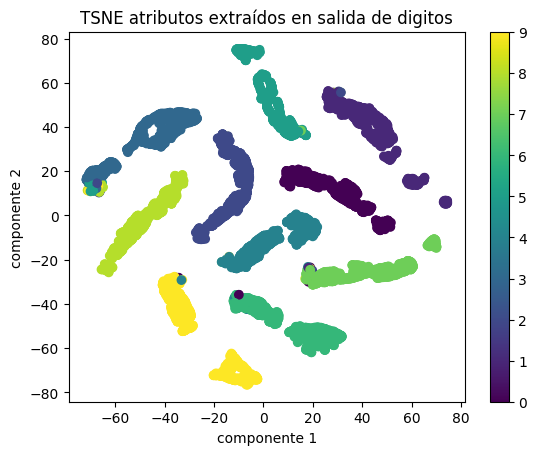

In [33]:
import random
from sklearn.manifold import TSNE

n = 4000
ind = np.random.choice(z_digits.shape[0], n, replace=False)
z_n = z_digits[ind, :]

zTSNE = TSNE(n_components = 2).fit_transform(z_n)
zTSNE.shape

plt.scatter(zTSNE[:,0], zTSNE[:,1], c = y[ind])
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('TSNE atributos extraídos en salida de digitos')
plt.show()

In [34]:
z_parity = z[1]
z_parity.shape

(10000, 2)

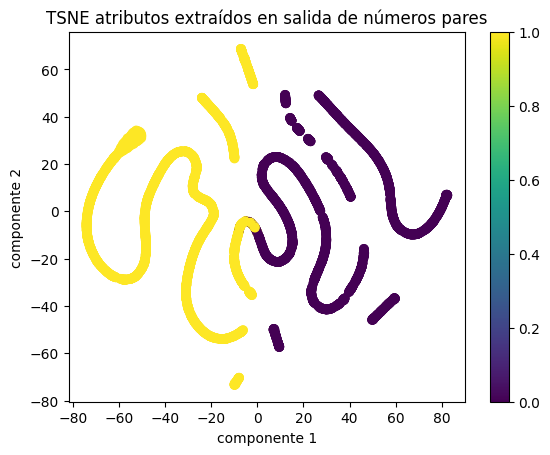

In [35]:
ind = np.random.choice(z_parity.shape[0], n, replace=False)
z_n = z_parity[ind, :]

zTSNE = TSNE(n_components = 2).fit_transform(z_n)
zTSNE.shape

plt.scatter(zTSNE[:,0], zTSNE[:,1], c = y_odd_pair[ind])
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('TSNE atributos extraídos en salida de números pares')
plt.show()